In [1]:
# import the libraries
import pandas as pd
import numpy as np

In [2]:
df_orders = pd.read_csv('orders_and_shipments.csv',encoding='ISO-8859-1')
df_inventory = pd.read_csv('inventory.csv')
df_fulfillment = pd.read_csv('fulfillment.csv')

In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0    Order ID                    30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

In [4]:
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB


In [5]:
df_fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [6]:

import pandas as pd
merged_df = pd.merge(df_orders, df_inventory, on='Product Name', how='inner')
merged_df = pd.merge(merged_df, df_fulfillment, on='Product Name', how='inner')


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110063 entries, 0 to 1110062
Data columns (total 28 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0    Order ID                             1110063 non-null  int64  
 1    Order Item ID                        1110063 non-null  int64  
 2    Order YearMonth                      1110063 non-null  int64  
 3    Order Year                           1110063 non-null  int64  
 4    Order Month                          1110063 non-null  int64  
 5    Order Day                            1110063 non-null  int64  
 6   Order Time                            1110063 non-null  object 
 7   Order Quantity                        1110063 non-null  int64  
 8   Product Department                    1110063 non-null  object 
 9   Product Category                      1110063 non-null  object 
 10  Product Name                          1110063 non-null

In [8]:

df = merged_df


In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


In [10]:
if df.duplicated().any():
    print(f"There are as many as {supply_data.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


In [11]:
df.columns = df.columns.str.strip()

In [12]:
df['Discount %'].sample(30)

359293       0.2
923988      0.07
52431       0.03
809503       0.2
29525       0.07
544522      0.05
952100       -  
560187      0.18
223689      0.17
884028       -  
261321      0.12
432968      0.06
551368       -  
1092286     0.04
1035744     0.13
488794      0.15
679029      0.03
225751       0.2
1005112     0.01
505525      0.18
819563      0.13
299778      0.15
839441      0.03
521435       0.1
958351      0.09
526306      0.02
514781      0.12
960825       -  
119934      0.12
821055      0.01
Name: Discount %, dtype: object

In [13]:
# Convert the '-' values to 0 in the 'Discount %' column and then change the data type from object to float
df['Discount %'] = df['Discount %'].replace('  -  ', 0).astype(float)

In [14]:
# Make new columns: Order Datetime and Shipment Datetime
df['Order Datetime'] = pd.to_datetime(df['Order Year'].astype(str) + '-' + df['Order Month'].astype(str) + '-' + df['Order Day'].astype(str) + ' ' + df['Order Time'])
df['Shipment Datetime'] = pd.to_datetime(df['Shipment Year'].astype(str) + '-' + df['Shipment Month'].astype(str) + '-' + df['Shipment Day'].astype(str))

# Displaying the result
df[['Order Datetime', 'Shipment Datetime']].head()

Order Datetime Shipment Datetime
0 2015-02-21 14:07:00        2015-02-27
1 2015-02-21 14:07:00        2015-02-27
2 2015-02-21 14:07:00        2015-02-27
3 2015-02-21 14:07:00        2015-02-27
4 2015-02-21 14:07:00        2015-02-27

In [15]:
df.drop(columns=['Order Year', 'Order Month', 'Order Day', 'Order Time',
                        'Shipment Year', 'Shipment Month', 'Shipment Day'], inplace=True)

In [16]:
df['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican\xa0Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d\x92Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'Nigeria', 'Vietnam', 'Bolivia', 'El Salvador', 'Colombia',
       'Belgium', 'Portugal', 'New zealand', 'Egypt', 'Gabon', 'Ireland',
       'Ghana', 'Thailand', 'Russia', 'Malaysia', 'Austria', 'Belarus',
       'Mali', 'Switzerland', 'Kenya', 'Saudi Arabia', 'Jordania',
       'Ukraine', 'Norway', 'Algeria\xa0', 'Lithuania', 'Barbados',
       'Guyana', 'Myanm

In [17]:
df['Customer Country'] = df['Customer Country'].replace({
    'Dominican\xa0Republic': 'Dominican Republic',
    'Cote d\x92Ivoire': 'Cote d Ivoire', # Added a comma at the end of this line
    'Perú': 'Peru',
    'Algeria\xa0': 'Algeria',
    'Israel\xa0':'Israel',
    'Benín': 'Benin'
})
df['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'Nigeria', 'Vietnam', 'Bolivia', 'El Salvador', 'Colombia',
       'Belgium', 'Portugal', 'New zealand', 'Egypt', 'Gabon', 'Ireland',
       'Ghana', 'Thailand', 'Russia', 'Malaysia', 'Austria', 'Belarus',
       'Mali', 'Switzerland', 'Kenya', 'Saudi Arabia', 'Jordania',
       'Ukraine', 'Norway', 'Algeria', 'Lithuania', 'Barbados', 'Guyana',
       'Myanmar', 'Zamb

In [18]:
df['Order Processing Time'] = (df['Shipment Datetime'] - df['Order Datetime']).dt.days
df['Order Processing Time'] = df['Order Processing Time'].apply(lambda x: 0 if x == -1 else x)

df.sample(5)

Order ID  Order Item ID  Order YearMonth  Order Quantity  \
64844      47655         119156           201611               1   
652458     59666         149321           201701               4   
664821     47883         119742           201611               3   
958797     27828          69664           201512               1   
404980     39046          97460           201607               5   

       Product Department      Product Category  \
64844            Fan Shop               Fishing   
652458               Golf       Women's Apparel   
664821               Golf       Women's Apparel   
958797            Apparel        Men's Footwear   
404980           Fan Shop  Indoor/Outdoor Games   

                                     Product Name  Customer ID  \
64844   Field & Stream Sportsman 16 Gun Fire Safe         9500   
652458       Nike Men's Dri-FIT Victory Golf Polo         4749   
664821       Nike Men's Dri-FIT Victory Golf Polo         9489   
958797    Nike Men's CJ Elite 2 TD Football Cleat         1131   
404980           O'Brien Men's Neoprene Life Vest         4366   

       Customer Market Customer Region  ... Gross Sales Discount % Profit  \
64844           Africa    North Africa  ...         400       0.02    200   
652458           LATAM   South America  ...         200       0.20    125   
664821          Africa  Central Africa  ...         150       0.02    125   
958797    Pacific Asia  Southeast Asia  ...         130       0.16     65   
404980   North America   South of  USA  ...         250       0.02    125   

        Year Month  Warehouse Inventory  Inventory Cost Per Unit  \
64844       201704                    8                  2.18091   
652458      201705                  618                  1.72087   
664821      201602                   11                  1.94130   
958797      201503                  169                  2.20751   
404980      201608                  528                  0.36478   

        Warehouse Order Fulfillment (days)      Order Datetime  \
64844                                  4.9 2016-11-26 15:19:00   
652458                                 6.6 2017-01-08 15:05:00   
664821                                 6.6 2016-11-29 23:11:00   
958797                                 7.0 2015-12-27 13:30:00   
404980                                 5.5 2016-07-23 23:12:00   

        Shipment Datetime  Order Processing Time  
64844          2016-12-02                      5  
652458         2017-01-10                      1  
664821         2016-12-01                      1  
958797         2015-12-31                      3  
404980         2016-07-25                      1  

[5 rows x 24 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110063 entries, 0 to 1110062
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   Order ID                            1110063 non-null  int64         
 1   Order Item ID                       1110063 non-null  int64         
 2   Order YearMonth                     1110063 non-null  int64         
 3   Order Quantity                      1110063 non-null  int64         
 4   Product Department                  1110063 non-null  object        
 5   Product Category                    1110063 non-null  object        
 6   Product Name                        1110063 non-null  object        
 7   Customer ID                         1110063 non-null  int64         
 8   Customer Market                     1110063 non-null  object        
 9   Customer Region                     1110063 non-null  object        

In [20]:
#Total Cost of Inventory is a significant financial metric in supply chain management that calculates the overall cost associated with holding and managing inventory.
df['Storage_Cost'] = df['Inventory Cost Per Unit']*df['Warehouse Inventory']

In [21]:
#Profit Margin helps to assessing the profitability of the supply chain operations. It provides insights into the effectiveness of cost control and pricing strategies, enabling organizations to make adjustments to enhance overall profitability.
df['Profit_Margin'] = (df['Profit'] / df['Gross Sales']*100)

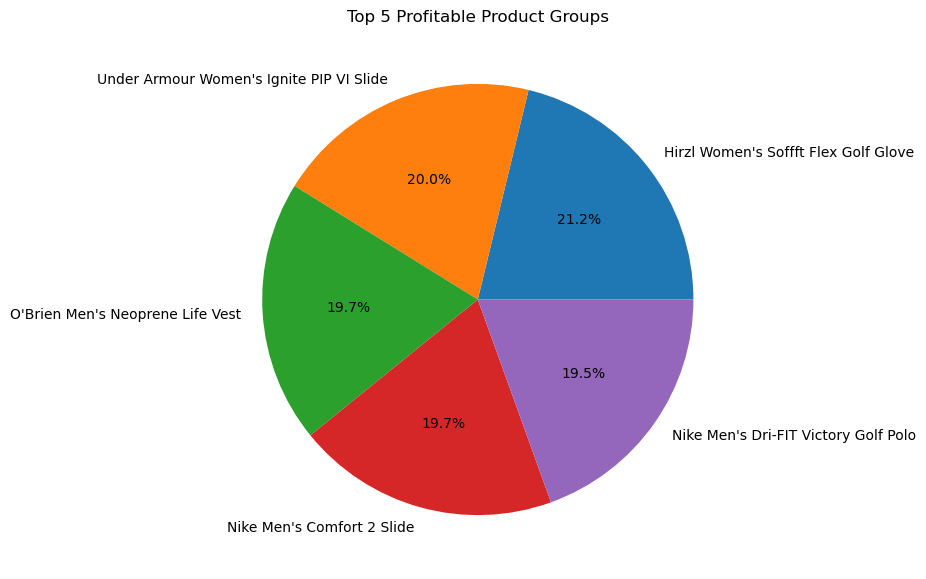

In [22]:
import matplotlib.pyplot as plt

# Calculate the top 5 profitable product groups
top_5_product_groups = df.groupby('Product Name')['Profit_Margin'].mean().sort_values(ascending=False).head(5)

# Extract product names and profit margins
product_names = top_5_product_groups.index.to_list()
profit_margins = top_5_product_groups.values.tolist()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(profit_margins, labels=product_names, autopct="%1.1f%%")
plt.title("Top 5 Profitable Product Groups")
plt.show()


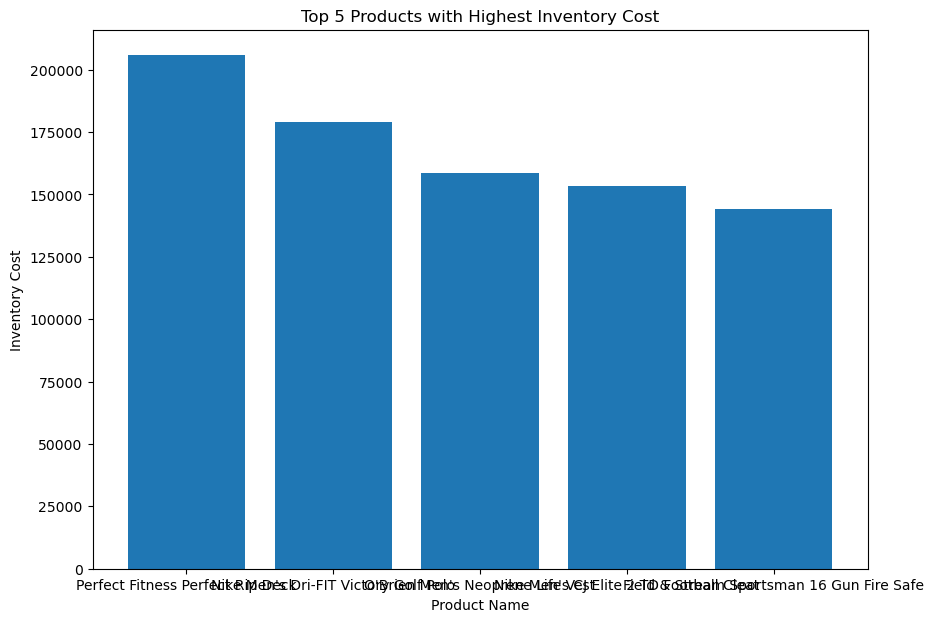

In [23]:

import matplotlib.pyplot as plt
# Calculate the top 5 products with highest inventory cost
top_5_products_inventory_cost = df.groupby('Product Name')['Inventory Cost Per Unit'].sum().sort_values(ascending=False).head(5)

# Extract product names and inventory cost
product_names = top_5_products_inventory_cost.index.to_list()
inventory_cost = top_5_products_inventory_cost.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(product_names, inventory_cost)
plt.title("Top 5 Products with Highest Inventory Cost")
plt.xlabel("Product Name")
plt.ylabel("Inventory Cost")
plt.show()


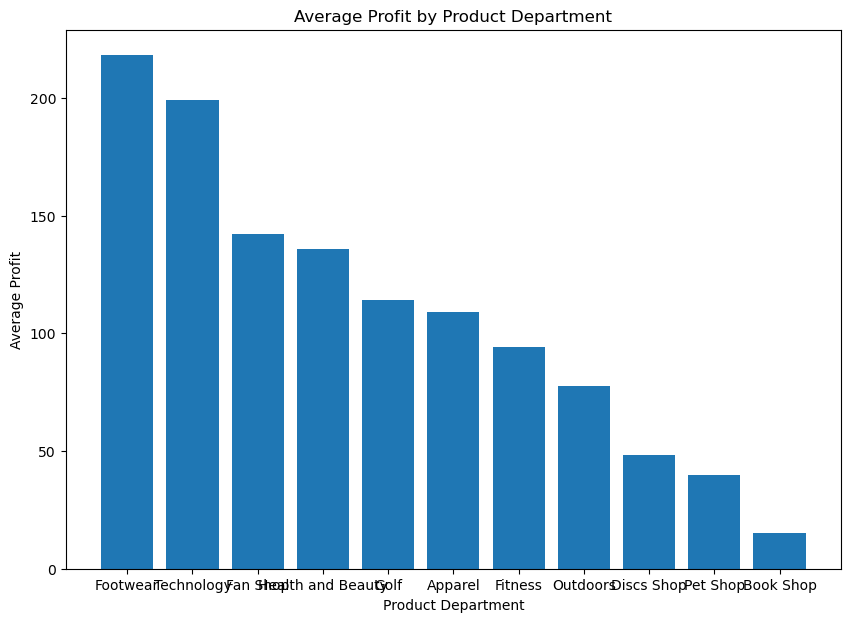

In [24]:

import matplotlib.pyplot as plt
# Calculate average profit per product department
avg_profit_by_department = df.groupby('Product Department')['Profit'].mean().sort_values(ascending=False)

# Extract product department names and average profit
department_names = avg_profit_by_department.index.to_list()
avg_profit = avg_profit_by_department.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(department_names, avg_profit)
plt.title("Average Profit by Product Department")
plt.xlabel("Product Department")
plt.ylabel("Average Profit")
plt.show()


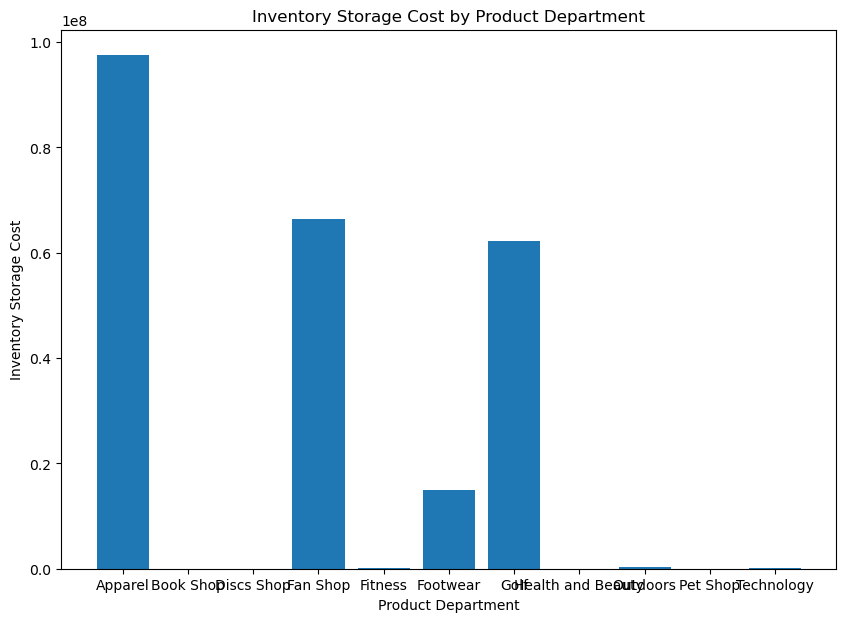

In [25]:

import matplotlib.pyplot as plt
# Calculate the inventory storage cost per product department
storage_cost_by_department = df.groupby('Product Department')['Storage_Cost'].sum()

# Extract product department names and storage cost
department_names = storage_cost_by_department.index.to_list()
storage_cost = storage_cost_by_department.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(department_names, storage_cost)
plt.title("Inventory Storage Cost by Product Department")
plt.xlabel("Product Department")
plt.ylabel("Inventory Storage Cost")
plt.show()


In [26]:
# Calculate the supply chain risk assessment score
df['Supply Chain Risk Assessment'] = (df['Order Processing Time'] + df['Storage_Cost'] + df['Inventory Cost Per Unit']) / df['Profit_Margin']

# Display the supply chain risk assessment score for each product
df['Supply Chain Risk Assessment'].head()


0    0.127830
1    0.144369
2    0.108093
3    0.369390
4    6.685936
Name: Supply Chain Risk Assessment, dtype: float64

In [27]:

import numpy as np
# Import necessary libraries
from sklearn.cluster import KMeans

# Extract relevant data for clustering
data = df[['Order Processing Time', 'Storage_Cost', 'Inventory Cost Per Unit']]

# Determine the optimal number of clusters using the elbow method
inertia_scores = []
cluster_num = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    inertia_scores.append(kmeans.inertia_)
    cluster_num.append(n)

# Select the optimal number of clusters based on the elbow method
optimal_clusters = cluster_num[np.argmin(inertia_scores)]

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

# Add cluster labels to the DataFrame
df['Customer Segment'] = kmeans.labels_

# Analyze customer segments
df.groupby('Customer Segment').agg({'Order Processing Time': 'mean', 'Storage_Cost': 'mean', 'Inventory Cost Per Unit': 'mean'})


Order Processing Time  Storage_Cost  Inventory Cost Per Unit
Customer Segment                                                              
0                              1.755741   1180.399819                 2.193236
1                              2.847509    147.768049                 1.209536
2                              3.983609    549.155431                 1.408840
3                              1.572926   1814.635635                 2.003120
4                            491.562967    145.666048                 1.146551
5                           -495.419188    142.475131                 1.145064
6                              3.629650    312.039287                 1.418111
7                              2.682289     27.974873                 1.090038
8                              1.989444    813.350438                 1.629056

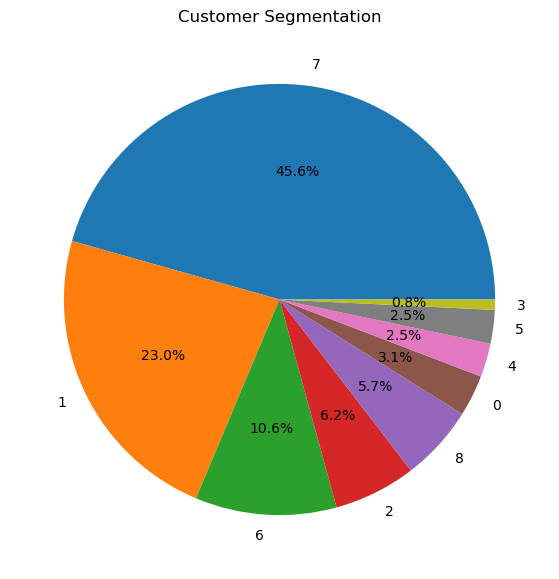

In [28]:
# prompt: plot the customer segment in pie chart

import matplotlib.pyplot as plt
# Calculate the number of customers in each segment
segment_counts = df['Customer Segment'].value_counts()

# Extract segment labels and counts
labels = segment_counts.index.to_list()
counts = segment_counts.values.tolist()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.title("Customer Segmentation")
plt.show()


# Shubham Patil

/var/folders/4z/1l1s8bz96kd3yz0ts7htzv1c0000gn/T/ipykernel_40331/149833508.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Order YearMonth', y='Gross Sales', data=df, estimator='sum', ci=None)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


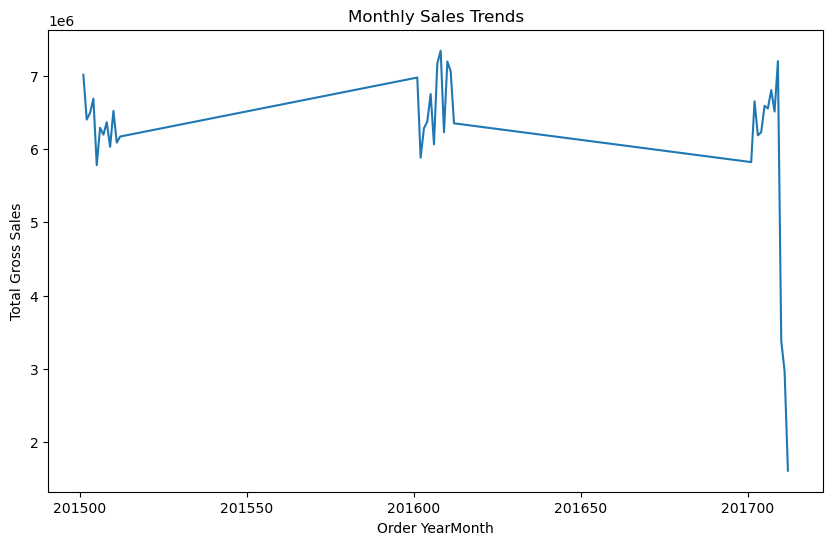

In [30]:
import seaborn as sns
# Monthly Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order YearMonth', y='Gross Sales', data=df, estimator='sum', ci=None)
plt.title('Monthly Sales Trends')
plt.xlabel('Order YearMonth')
plt.ylabel('Total Gross Sales')
plt.show()

/var/folders/4z/1l1s8bz96kd3yz0ts7htzv1c0000gn/T/ipykernel_40331/855195561.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Department', y='Gross Sales', data=df, estimator=sum, ci=None)


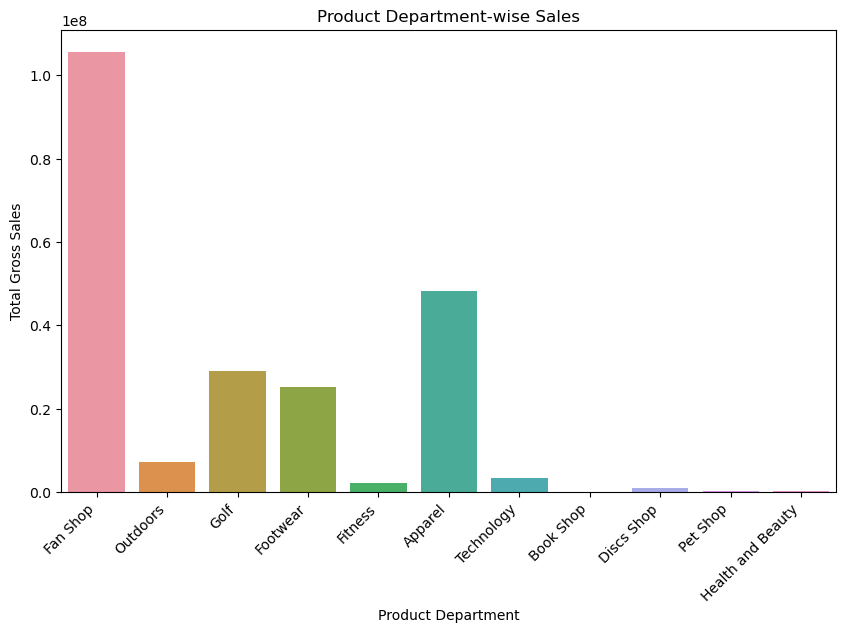

In [32]:
# Product Department-wise Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Department', y='Gross Sales', data=df, estimator=sum, ci=None)
plt.title('Product Department-wise Sales')
plt.xlabel('Product Department')
plt.ylabel('Total Gross Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

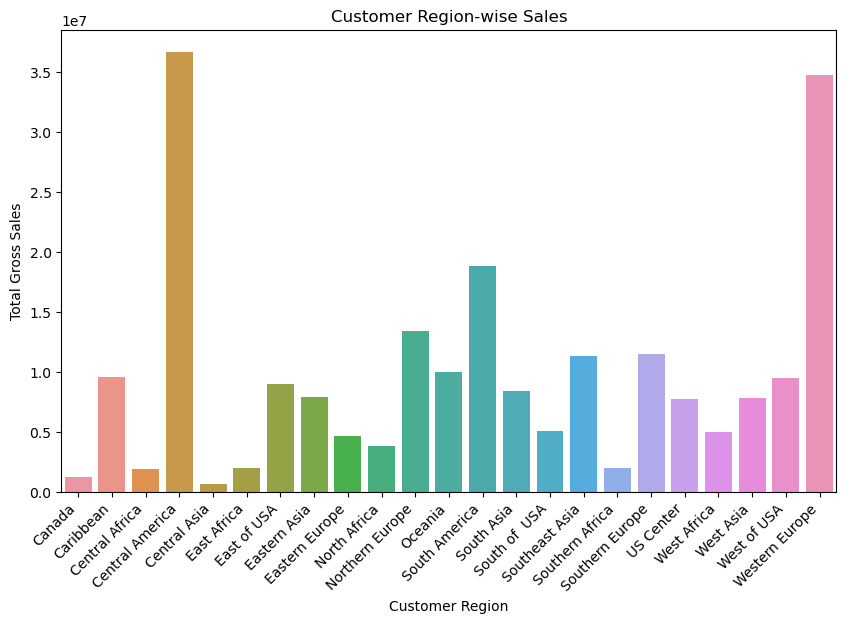

In [34]:
# Customer Region-wise Sales
plt.figure(figsize=(10, 6))
df_region = df.groupby('Customer Region')['Gross Sales'].sum().reset_index()
sns.barplot(x='Customer Region', y='Gross Sales', data=df_region)
plt.title('Customer Region-wise Sales')
plt.xlabel('Customer Region')
plt.ylabel('Total Gross Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

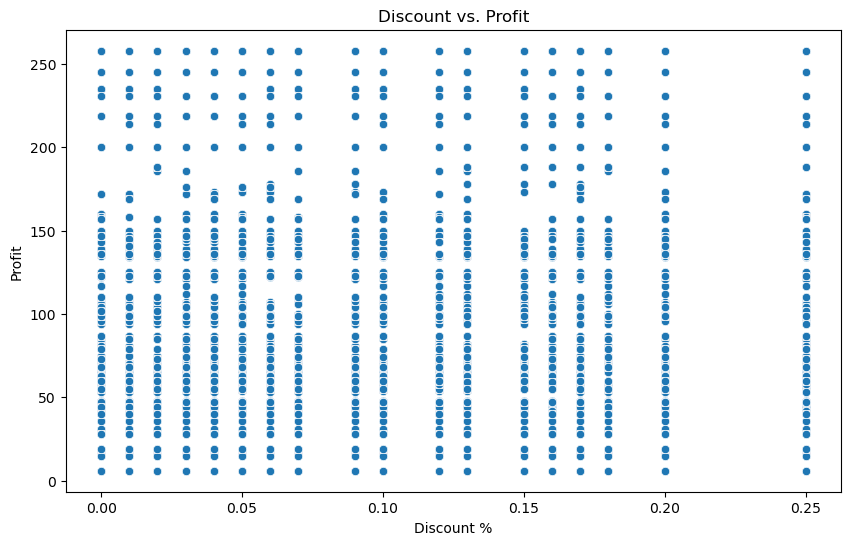

In [35]:
# Discount vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount %', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.xlabel('Discount %')
plt.ylabel('Profit')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


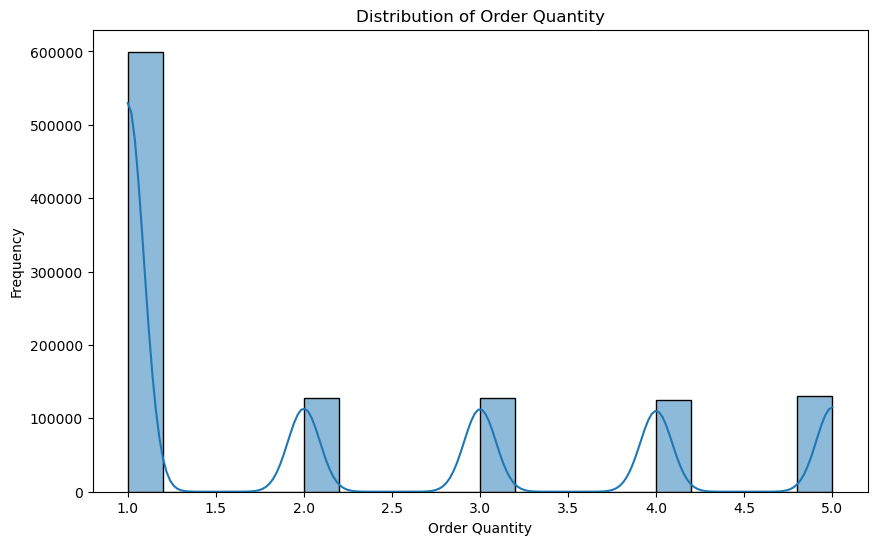

In [36]:
# Distribution of Order Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Order Quantity'], bins=20, kde=True)
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

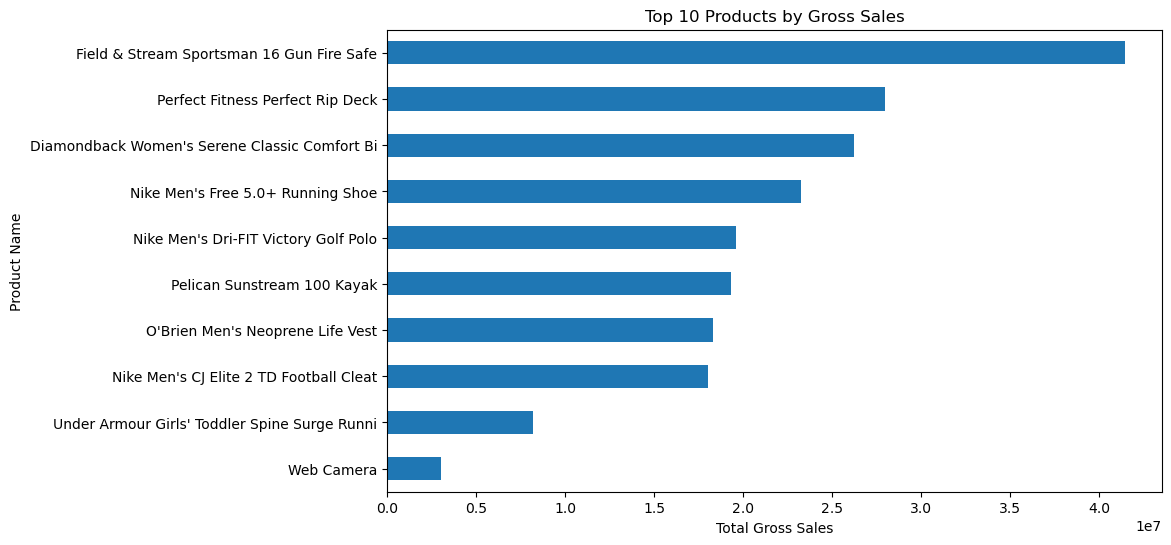

In [37]:
# Top Products by Gross Sales
top_products = df.groupby('Product Name')['Gross Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Gross Sales')
plt.xlabel('Total Gross Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Invert y-axis to show top products at the top
plt.show()

/var/folders/4z/1l1s8bz96kd3yz0ts7htzv1c0000gn/T/ipykernel_40331/1500118382.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Market', y='Gross Sales', hue='Product Department', data=df, estimator=sum, ci=None)


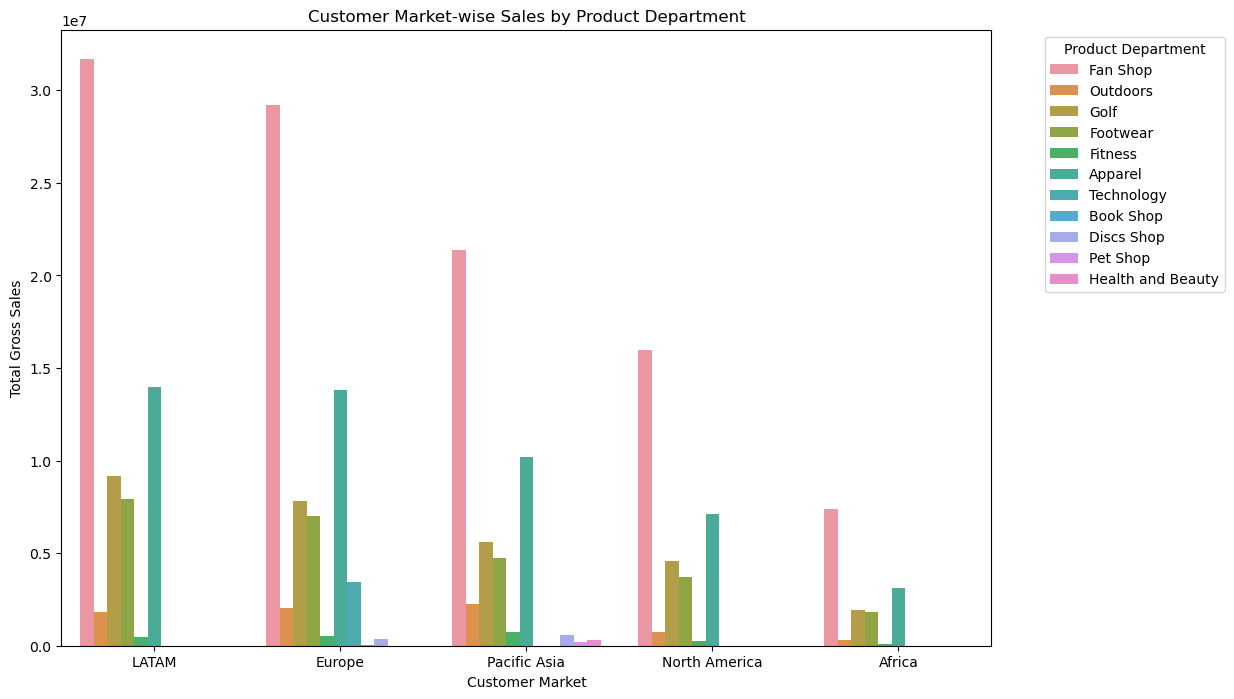

In [38]:
# Customer Market-wise Sales
plt.figure(figsize=(12, 8))
sns.barplot(x='Customer Market', y='Gross Sales', hue='Product Department', data=df, estimator=sum, ci=None)
plt.title('Customer Market-wise Sales by Product Department')
plt.xlabel('Customer Market')
plt.ylabel('Total Gross Sales')
plt.legend(title='Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


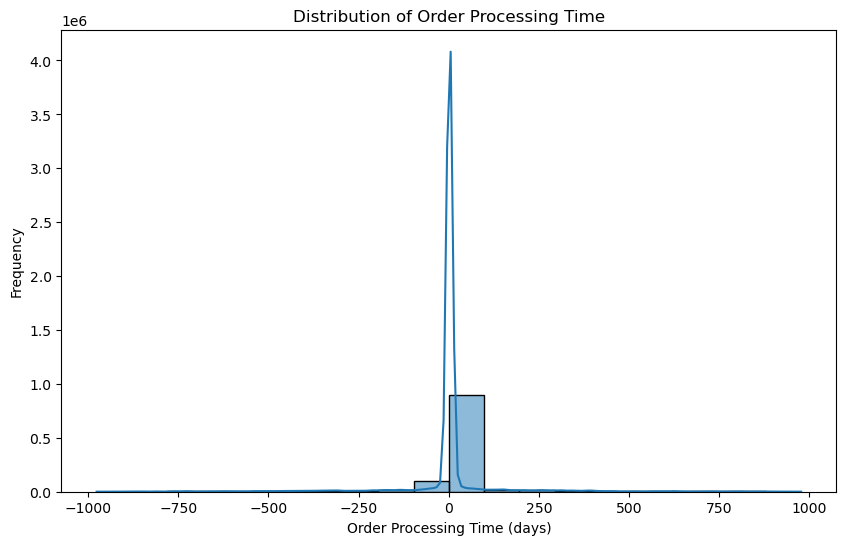

In [39]:
# Order Processing Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Order Processing Time'], bins=20, kde=True)
plt.title('Distribution of Order Processing Time')
plt.xlabel('Order Processing Time (days)')
plt.ylabel('Frequency')
plt.show()

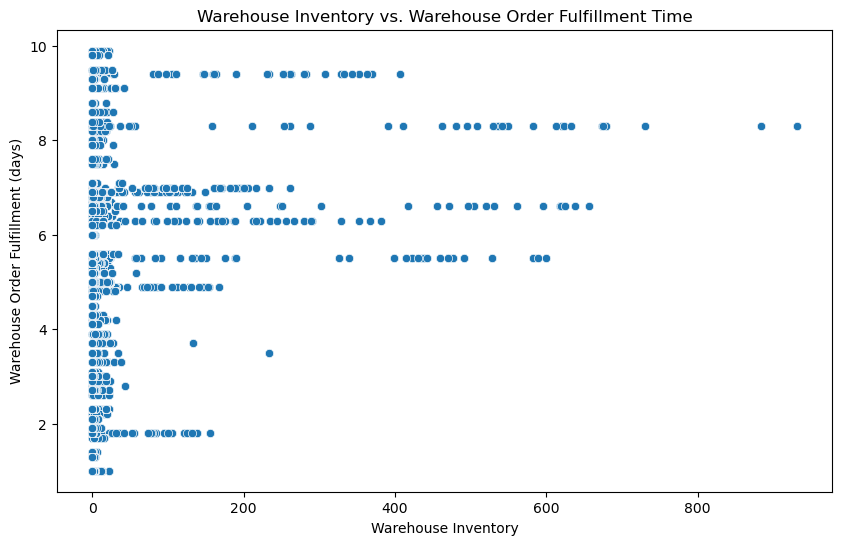

In [40]:
# Warehouse Inventory vs. Warehouse Order Fulfillment (days)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Warehouse Inventory', y='Warehouse Order Fulfillment (days)', data=df)
plt.title('Warehouse Inventory vs. Warehouse Order Fulfillment Time')
plt.xlabel('Warehouse Inventory')
plt.ylabel('Warehouse Order Fulfillment (days)')
plt.show()

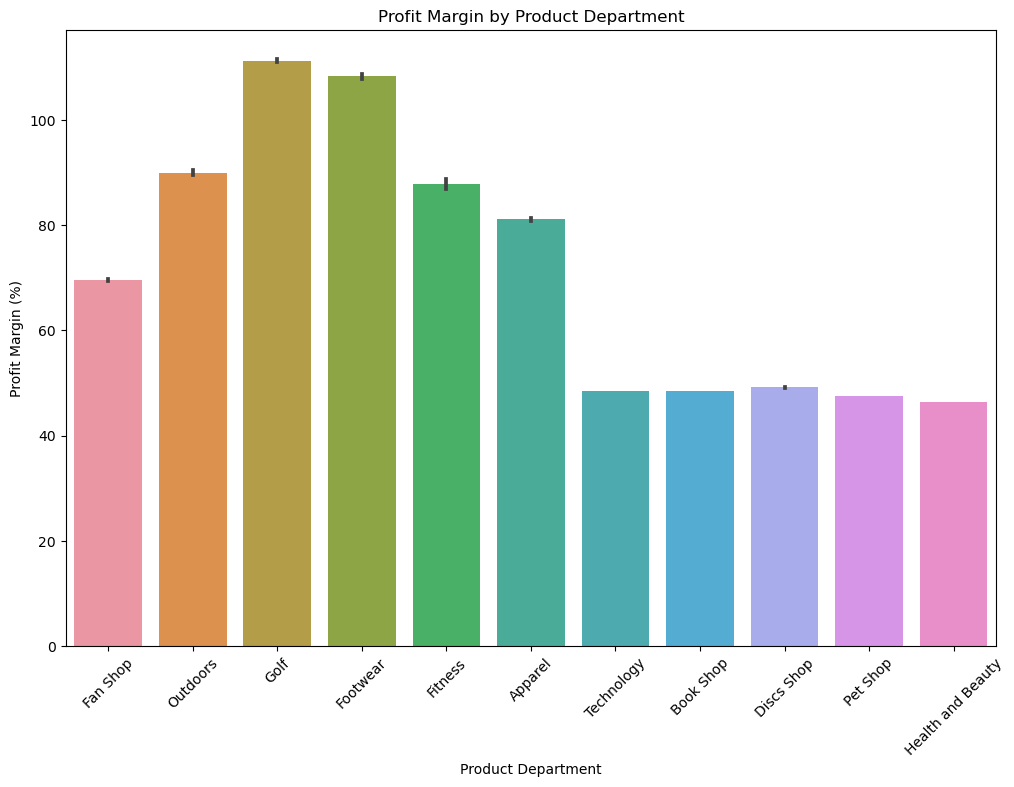

In [42]:
# Profit Margin by Product Department
df['Profit Margin'] = (df['Profit'] / df['Gross Sales']) * 100
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Department', y='Profit Margin', data=df)
plt.title('Profit Margin by Product Department')
plt.xlabel('Product Department')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

/var/folders/4z/1l1s8bz96kd3yz0ts7htzv1c0000gn/T/ipykernel_40331/1403297970.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Market', y='Order Quantity', data=df, estimator=sum, ci=None)


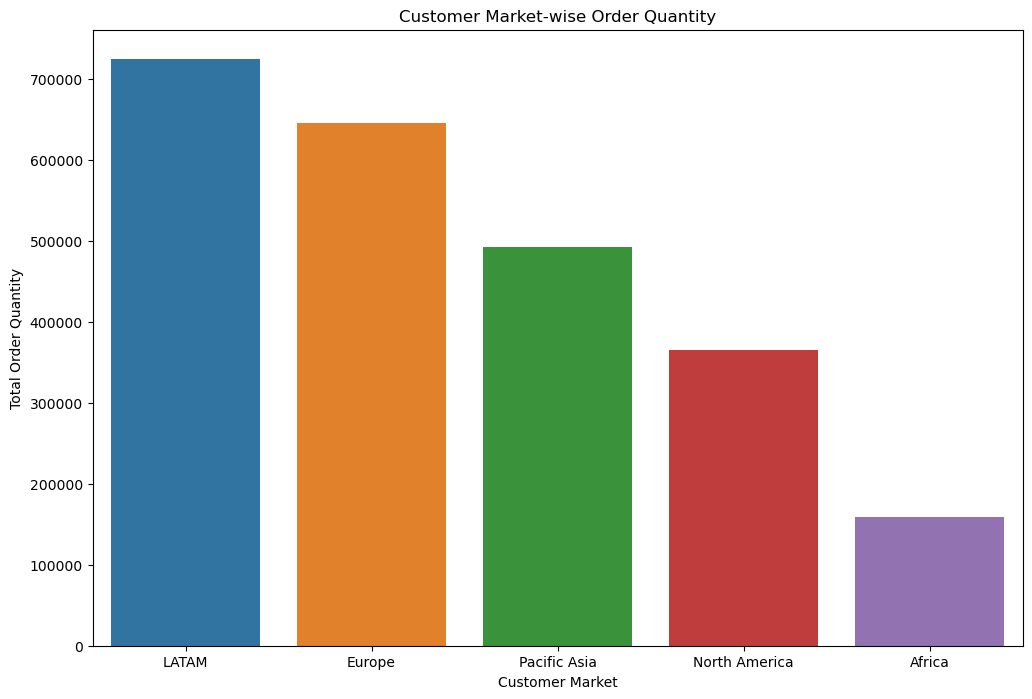

In [43]:
# Customer Market-wise Order Quantity
plt.figure(figsize=(12, 8))
sns.barplot(x='Customer Market', y='Order Quantity', data=df, estimator=sum, ci=None)
plt.title('Customer Market-wise Order Quantity')
plt.xlabel('Customer Market')
plt.ylabel('Total Order Quantity')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


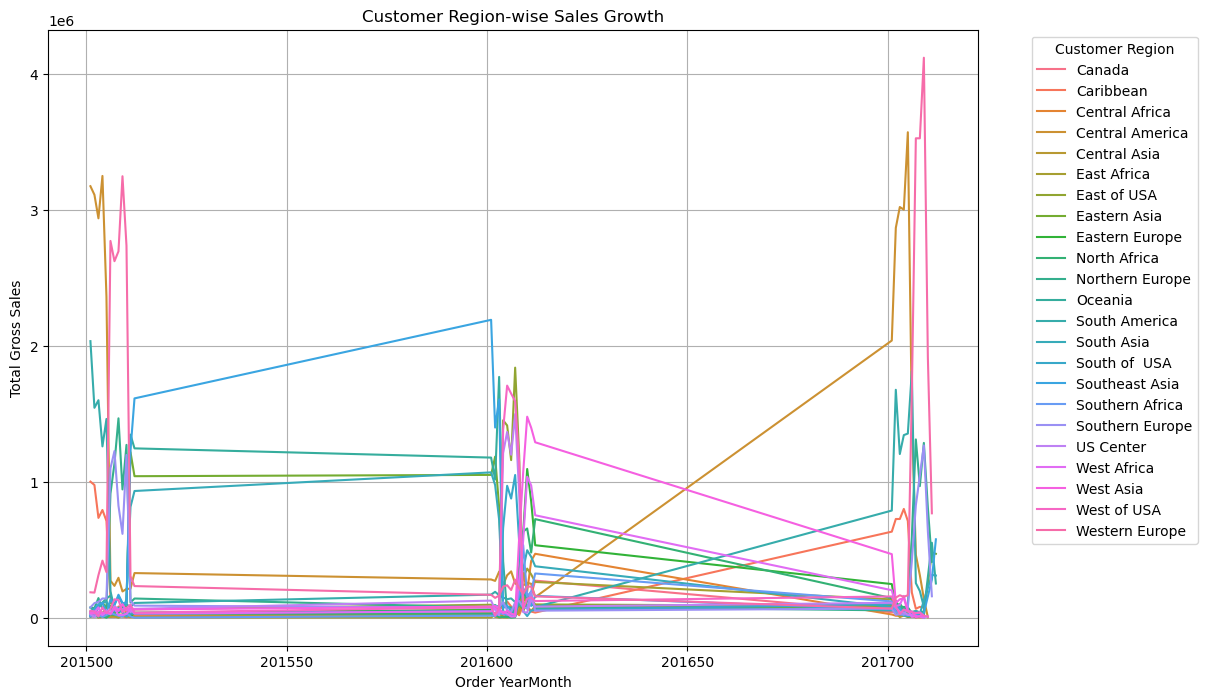

In [46]:
# Customer Region-wise Sales Growth
sales_growth = df.groupby(['Customer Region', 'Order YearMonth'])['Gross Sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Order YearMonth', y='Gross Sales', hue='Customer Region', data=sales_growth)
plt.title('Customer Region-wise Sales Growth')
plt.xlabel('Order YearMonth')
plt.ylabel('Total Gross Sales')
plt.grid(True)
plt.legend(title='Customer Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

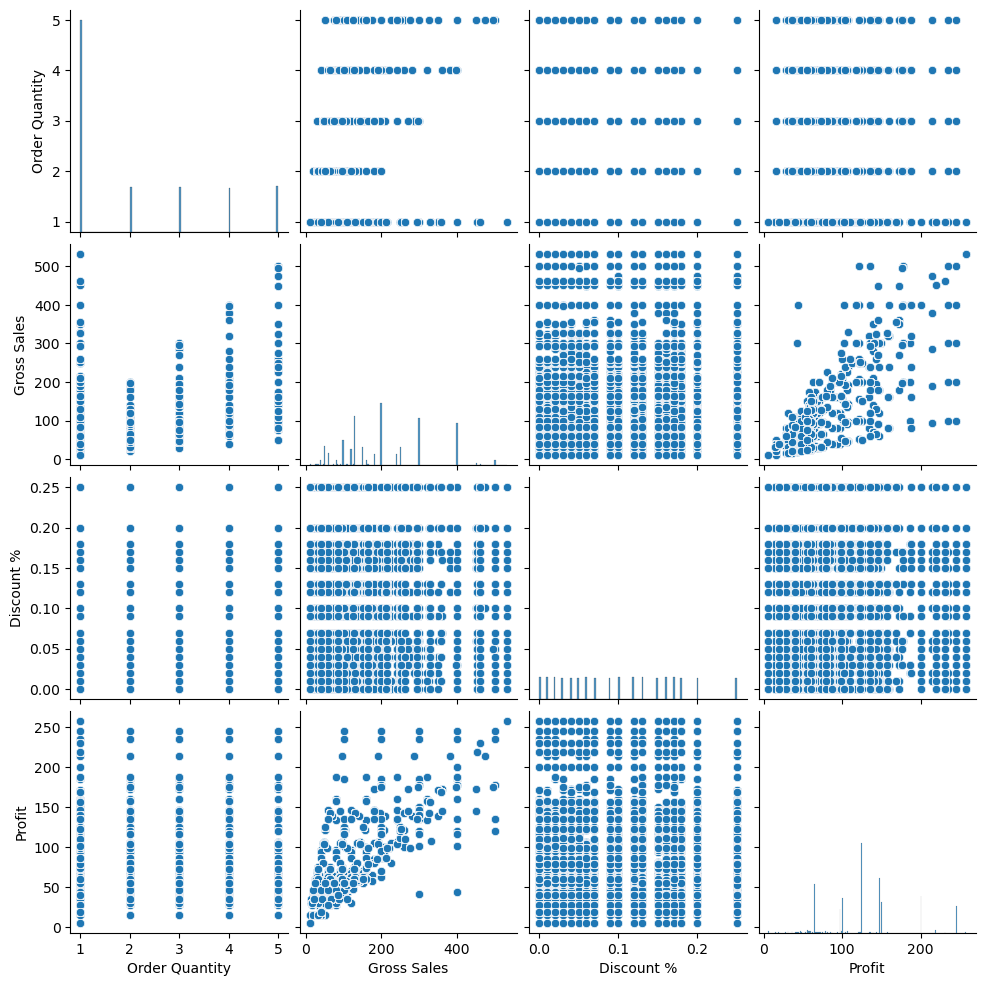

In [47]:
# Pairplot with Order Quantity and Gross Sales
sns.pairplot(df[['Order Quantity', 'Gross Sales', 'Discount %', 'Profit']])
plt.show()

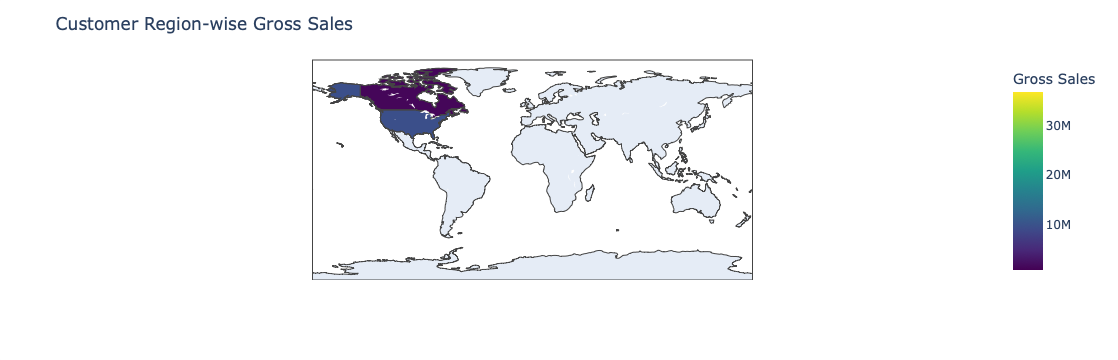

In [48]:
# Interactive Choropleth Map (using Plotly)
import plotly.express as px
region_sales = df.groupby('Customer Region')['Gross Sales'].sum().reset_index()
fig = px.choropleth(region_sales, locations='Customer Region', locationmode='country names', color='Gross Sales',
                    hover_name='Customer Region', color_continuous_scale='Viridis')
fig.update_layout(title_text='Customer Region-wise Gross Sales')
fig.show()

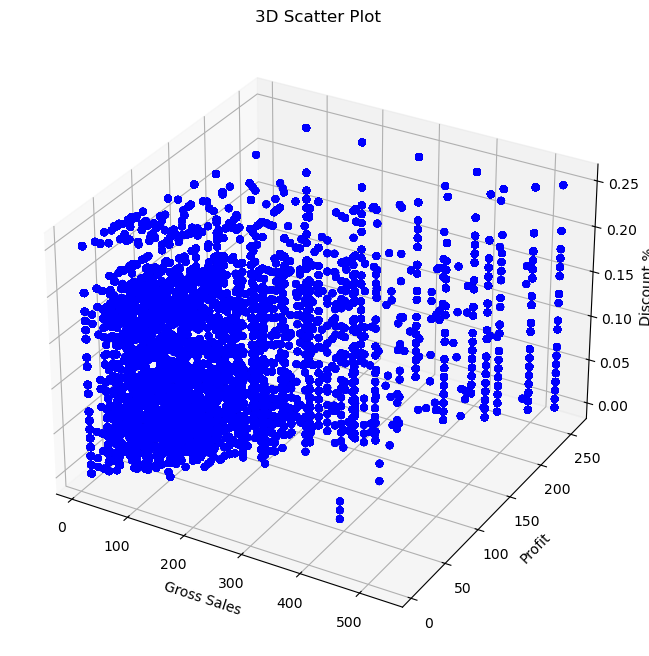

In [49]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gross Sales'], df['Profit'], df['Discount %'], c='blue', marker='o')
ax.set_xlabel('Gross Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Discount %')
plt.title('3D Scatter Plot')
plt.show()

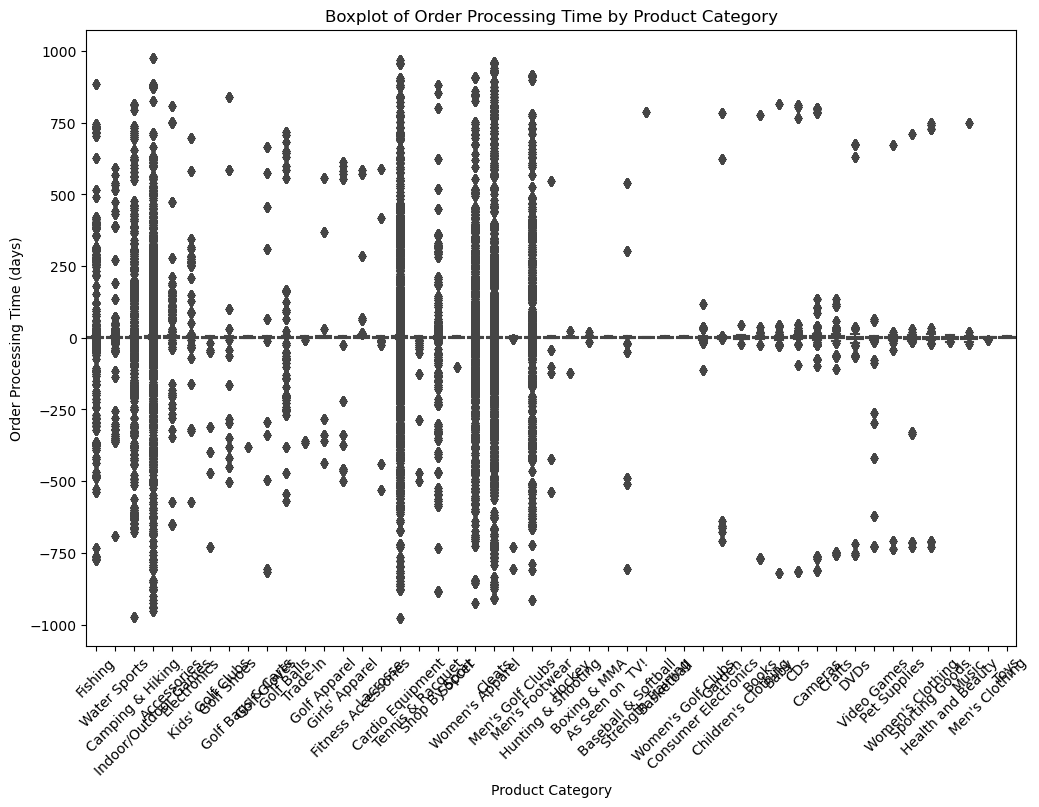

In [50]:
# Boxplot of Order Processing Time by Product Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product Category', y='Order Processing Time', data=df)
plt.title('Boxplot of Order Processing Time by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Order Processing Time (days)')
plt.xticks(rotation=45)
plt.show()